In [3]:
import numpy as np
import networkx as nx

import pylab as plt

In [4]:
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

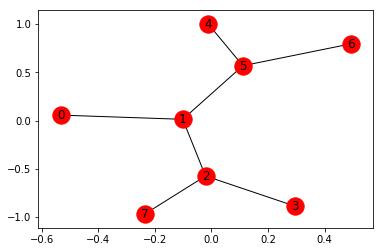

In [5]:
goal = 7

G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [6]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [9]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [34]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 0

# Filter available steps
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

In [35]:
available_act

array([1])

In [36]:
# Randomly choose an action from the available actions
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

action = sample_next_action(available_act)

In [37]:
action

1

In [38]:
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [42]:
def update(current_state, action, gamma):
    # Sorted indices of the Q matrix for given action
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
#     print('max_value', R[current_state, action] + gamma * max_value)

    if np.max(Q) > 0:
        return np.sum(Q/np.max(Q)*100)
    else:
        return 0
    
update(initial_state, action, gamma)

0

Trained Q matrix:
[[  0.          63.9969372    0.           0.           0.
    0.           0.           0.        ]
 [ 51.19754976   0.          79.9961715    0.           0.
   51.18773922   0.           0.        ]
 [  0.          63.9969372    0.          63.9969372    0.
    0.           0.          99.99521437]
 [  0.           0.          79.9961715    0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.18773922   0.           0.        ]
 [  0.          63.9969372    0.           0.          40.94686802
    0.          40.95803981   0.        ]
 [  0.           0.           0.           0.           0.
   51.19754976   0.           0.        ]
 [  0.           0.          79.98084253   0.           0.
    0.           0.         100.        ]]
Most efficient path:
[0, 1, 2, 7]


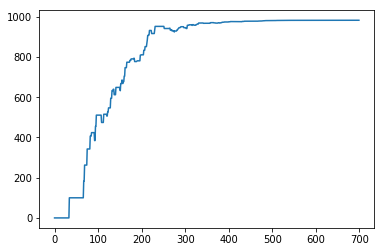

In [45]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
#     print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

### Environmental Details

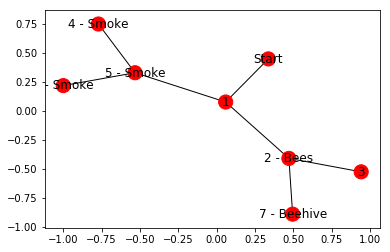

In [46]:
bees = [2]
smoke = [4,5,6]

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Start', 1:'1', 2:'2 - Bees', 3:'3', 4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'} 
H=nx.relabel_nodes(G,mapping) 
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()

In [48]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
 
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
 
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)
 
available_act = available_actions(initial_state) 
 
action = sample_next_action(available_act)

def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
#     print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_bees[current_state, action] += 1

    if 's' in environment: 
        enviro_smoke[current_state, action] += 1

    if np.max(Q) > 0:
        return np.sum(Q/np.max(Q)*100)
    else:
        return 0

update(initial_state,action,gamma)

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)

Bees Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 26.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 82.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 40.  0.  0.  0.  0.  0.]]
Smoke Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 27.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 87.  0.  0.]
 [ 0.  0.  0.  0. 28.  0. 32.  0.]
 [ 0.  0.  0.  0.  0. 86.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


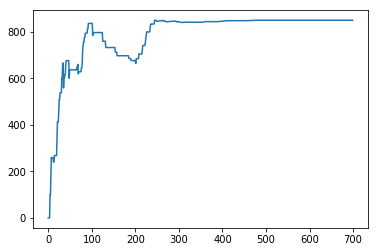

In [55]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
#             print('going from:',av_act)
#             print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
#     print('Score:', str(score))
 
plt.plot(scores)
plt.show()

### NChain

http://adventuresinmachinelearning.com/reinforcement-learning-tutorial-python-keras/

In [59]:
import gym

In [60]:
env = gym.make("NChain-v0")
env.reset()

0

In [125]:
def naive_sum_reward_agent(env, num_episodes=500):
    # this is the table that will hold our summated rewards for
    # each action in each state
    r_table = np.zeros((5, 2))
    for _ in range(num_episodes):
        s = env.reset()
        done = False
        while not done:
            if np.sum(r_table[s, :]) == 0:
#                 print(r_table)
#                 print(s)
                # make a random selection of actions
                a = np.random.randint(0, 2)
#                 print(a)
            else:
                # select the action with highest cumulative reward
                a = np.argmax(r_table[s, :])
            new_s, r, done, _ = env.step(a)
            r_table[s, a] += r
            s = new_s
    return r_table

In [127]:
r = naive_sum_reward_agent(env, num_episodes=100)
np.sum(r, axis=1)/np.sum(r)

array([0.78952012, 0.04009074, 0.13104057, 0.02598967, 0.01335891])

In [128]:
r

array([[     0., 112764.],
       [  5726.,      0.],
       [     0.,  18716.],
       [     0.,   3712.],
       [     0.,   1908.]])

In [129]:
def q_learning_with_table(env, num_episodes=500):
    q_table = np.zeros((5, 2))
    y = 0.95
    lr = 0.8
    for i in range(num_episodes):
        s = env.reset()
        done = False
        while not done:
            if np.sum(q_table[s,:]) == 0:
                # make a random selection of actions
                a = np.random.randint(0, 2)
            else:
                # select the action with largest q value in state s
                a = np.argmax(q_table[s, :])
            new_s, r, done, _ = env.step(a)
            q_table[s, a] += r + lr*(y*np.max(q_table[new_s, :]) - q_table[s, a])
            s = new_s
    return q_table

In [130]:
q = q_learning_with_table(env, num_episodes=500)

In [131]:
q

array([[ 0.        , 28.27159383],
       [23.38473219,  0.        ],
       [ 0.        , 23.28495293],
       [ 0.        , 28.59201593],
       [26.00763568,  0.        ]])

In [138]:
def eps_greedy_q_learning_with_table(env, num_episodes=500):
    q_table = np.zeros((5, 2))
    y = 0.95
    eps = 0.5
    lr = 0.8
    decay_factor = 0.999
    for i in range(num_episodes):
        s = env.reset()
        eps *= decay_factor
        done = False
        while not done:
            # select the action with highest cummulative reward
            if np.random.random() < eps or np.sum(q_table[s, :]) == 0:
                a = np.random.randint(0, 2)
            else:
                a = np.argmax(q_table[s, :])
            # pdb.set_trace()
            new_s, r, done, _ = env.step(a)
            q_table[s, a] += r + lr * (y * np.max(q_table[new_s, :]) - q_table[s, a])
            s = new_s
    return q_table

In [139]:
q = eps_greedy_q_learning_with_table(env, num_episodes=500)

In [140]:
q

array([[36.82001047, 36.97234649],
       [37.089952  , 38.39875191],
       [38.63505628, 38.77698586],
       [40.28428974, 38.85388124],
       [42.87958621, 40.06442139]])

In [143]:
def run_game(table, env):
    s = env.reset()
    tot_reward = 0
    done = False
    while not done:
        a = np.argmax(table[s, :])
        s, r, done, _ = env.step(a)
        tot_reward += r
    return tot_reward

In [146]:
def test_methods(env, num_iterations=100):
    winner = np.zeros((3,))
    for g in range(num_iterations):
        m0_table = naive_sum_reward_agent(env, 50)
        m1_table = q_learning_with_table(env, 50)
        m2_table = eps_greedy_q_learning_with_table(env, 50)
        m0 = run_game(m0_table, env)
        m1 = run_game(m1_table, env)
        m2 = run_game(m2_table, env)
        w = np.argmax(np.array([m0, m1, m2]))
        winner[w] += 1
        if (g+1)%10==0:
            print("Game {} of {}".format(g + 1, num_iterations))
    return winner

In [147]:
test_methods(env, num_iterations=100)

Game 10 of 100
Game 20 of 100
Game 30 of 100
Game 40 of 100


KeyboardInterrupt: 

Predicting the Q values given state

In [154]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [155]:
model = Sequential()
model.add(InputLayer(batch_input_shape=(1, 5)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [156]:
num_episodes = 10
# now execute the q learning
y = 0.95
eps = 0.5
decay_factor = 0.999
r_avg_list = []
for i in range(num_episodes):
    s = env.reset()
    eps *= decay_factor
    if i % 100 == 0:
        print("Episode {} of {}".format(i + 1, num_episodes))
    done = False
    r_sum = 0
    while not done:
        if np.random.random() < eps:
            a = np.random.randint(0, 2)
        else:
            # Choose the action based on the predictions
            a = np.argmax(model.predict(np.identity(5)[s:s + 1]))
        new_s, r, done, _ = env.step(a)
        # Add reward to the predictions
        target = r + y * np.max(model.predict(np.identity(5)[new_s:new_s + 1]))
        target_vec = model.predict(np.identity(5)[s:s + 1])[0]
        # Update the true output as one from model and one from model + reward
        target_vec[a] = target
        # Train for one iteration
        model.fit(np.identity(5)[s:s + 1], target_vec.reshape(-1, 2), epochs=1, verbose=0)
        s = new_s
        r_sum += r
    r_avg_list.append(r_sum / 1000)

Episode 1 of 10


In [157]:
r_avg_list

[1.098, 1.208, 1.326, 1.308, 1.34, 1.308, 1.386, 1.35, 1.334, 1.33]